In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/wzhang/Downloads/Agriculture Data.xlsx - Sheet1 (1).csv')

X = pd.DataFrame(dataset.iloc[:,0:15].values)
Y = pd.DataFrame(dataset.iloc[:,15:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

features = pd.DataFrame(dataset.iloc[:,0:15])
features = features.columns
print(features)

      0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
0      3   2   2  25  26   9   0   0   0   0   0   0   0   0   0
1      3   3   1  61  17   9   0   0   0   0   0   0   0   0   0
2      3   3   1  65  16   9   0   0   0   0   0   0   0   0   0
3      3   2   1  49  17   9   0   0   0   0   1   0   0   0   0
4      3   1   1  59  28   9   0   0   0   0   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
2416   1   1   1  50  25   9   0   0   0   0   0   0   0   0   0
2417   1   2   1  58  49   8   0   0   0   0   0   0   0   0   0
2418   1   2   1   3  36   9   0   0   0   0   0   0   0   0   0
2419   3   2   2  48  40   9   0   0   0   0   0   0   0   0   0
2420   1   1   1  81  37   7   0   0   0   0   0   0   0   0   0

[2421 rows x 15 columns]
      0
0     0
1     1
2     1
3     0
4     1
...  ..
2416  1
2417  0
2418  1
2419  0
2420  1

[2421 rows x 1 columns]
(1936, 15)
(1936, 1)
Index(['Location of Incident', 'Time', 'Sex', 'Age',

In [2]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

2024-07-22 14:23:50.296784: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model = xgb.XGBClassifier(n_bits = 6)
model.fit(X_train,Y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [14:23:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_bits" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_bits=6, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [4]:
res = model.predict(X_test)
print(Y_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

      0
1289  1
1538  1
2102  0
1232  1
229   0
...  ..
1648  0
3     0
193   0
1134  0
122   0

[485 rows x 1 columns]
              precision    recall  f1-score   support

           0   0.402062  0.263514  0.318367       148
           1   0.719072  0.827893  0.769655       337

    accuracy                       0.655670       485
   macro avg   0.560567  0.545703  0.544011       485
weighted avg   0.622335  0.655670  0.631943       485



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


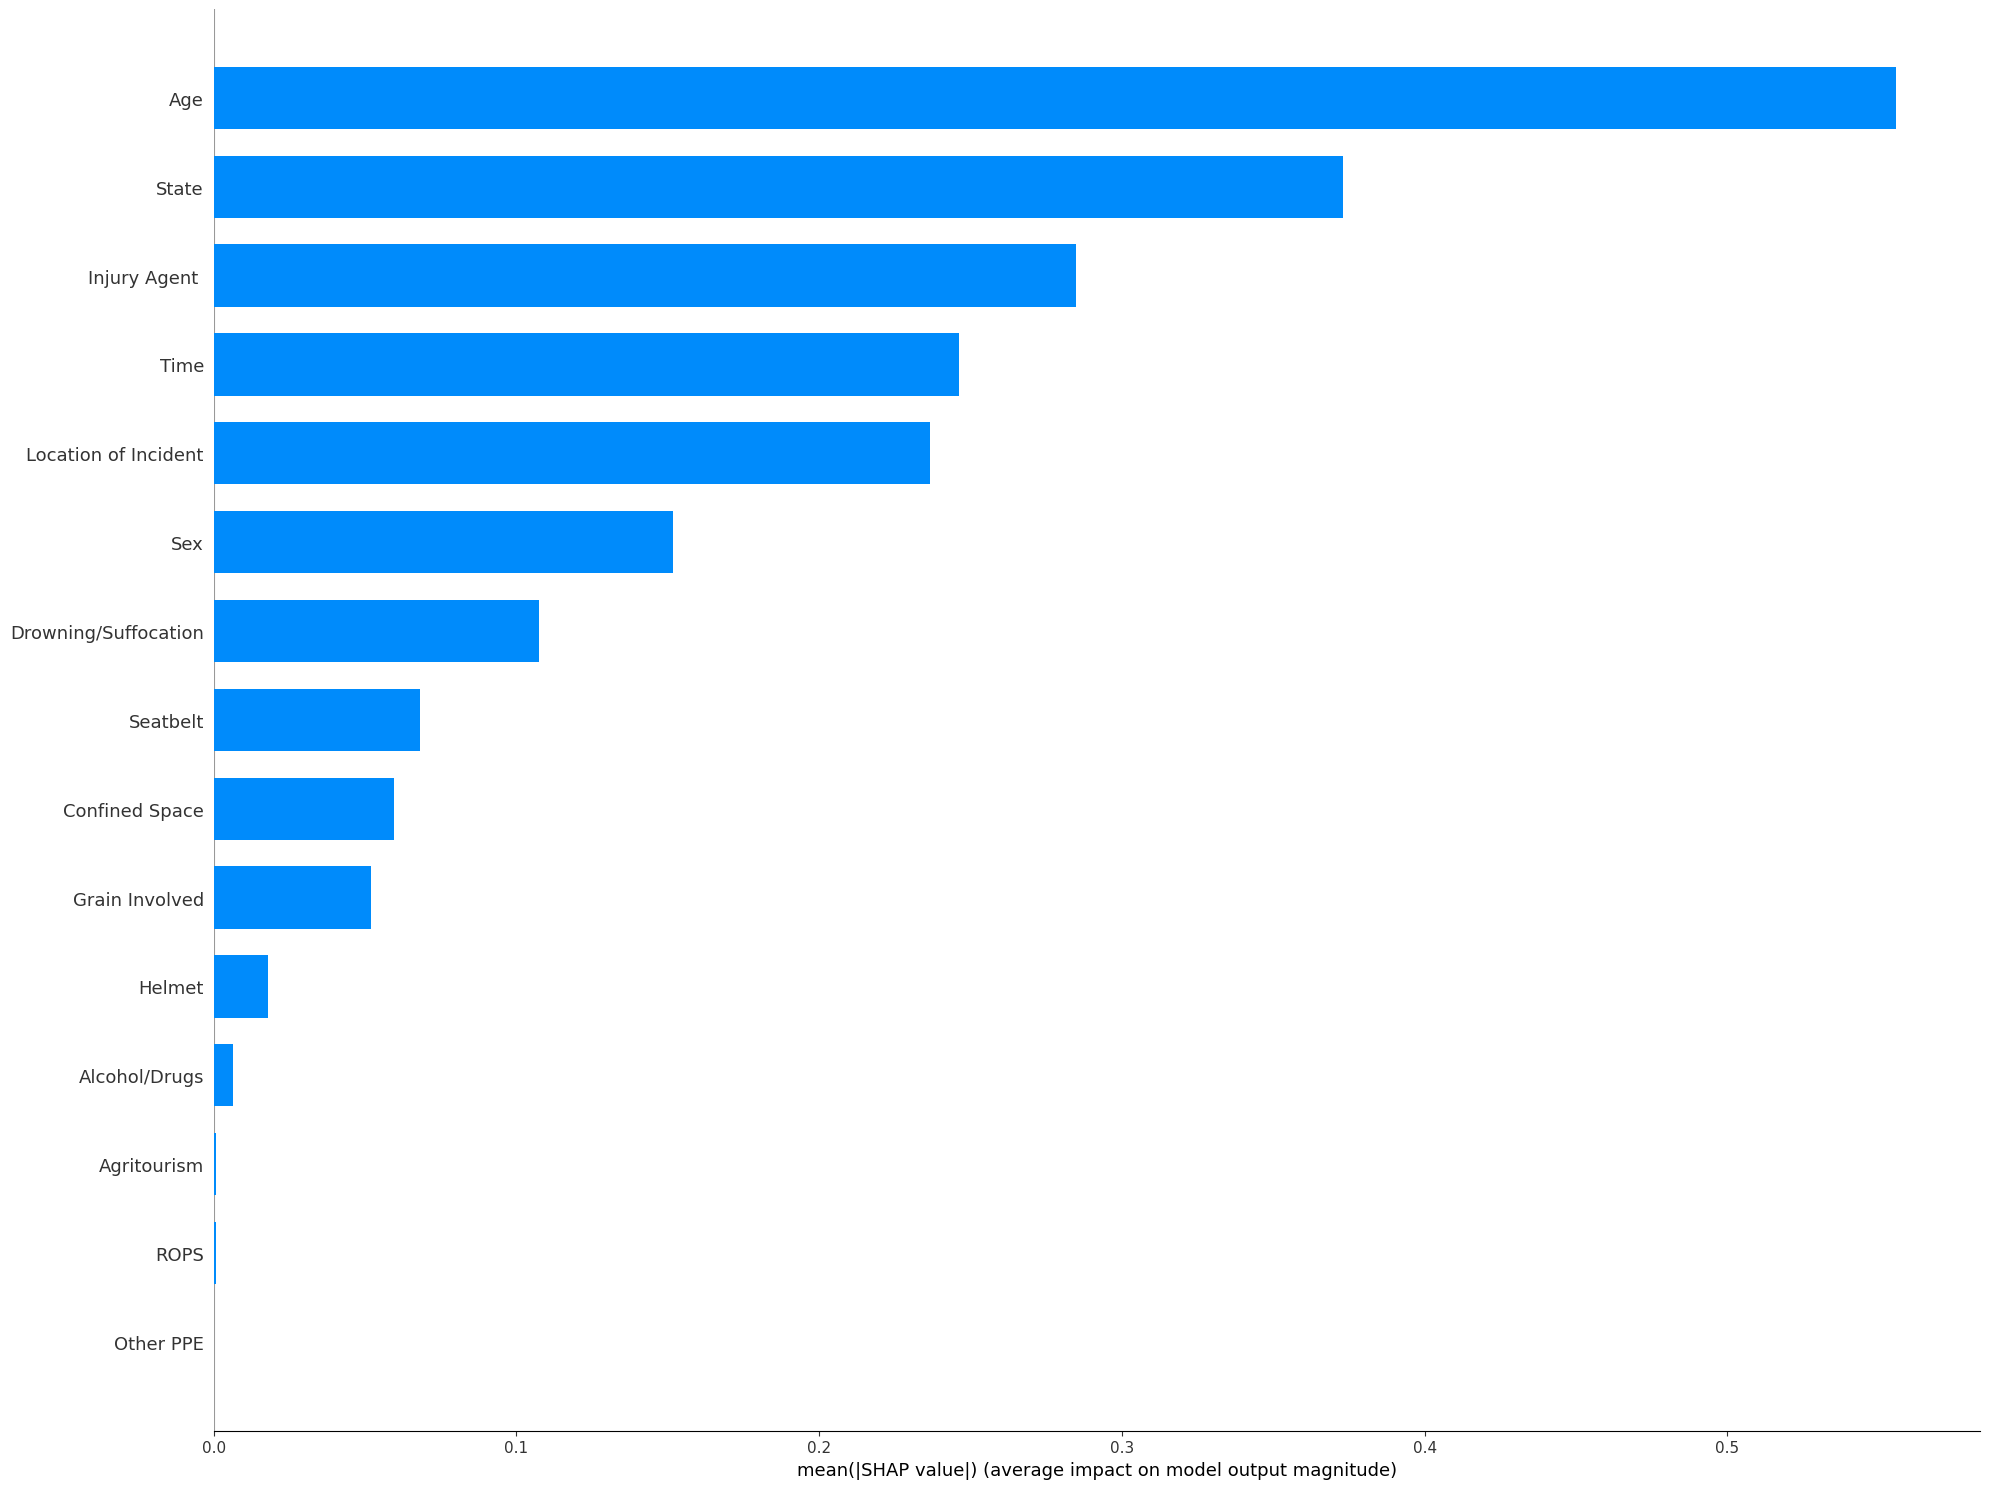

In [5]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)